# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [57]:
import os
import nltk as nltk
import json
import pandas as pd
%matplotlib inline
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [58]:
from dotenv import load_dotenv
load_dotenv()
api_key=os.getenv('news_api')

In [61]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [62]:
# Fetch the Bitcoin news articles
bitcoin_articles = news_api.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
bitcoin_articles
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

Total articles about Bitcoin: 7976


In [63]:
# Fetch the Ethereum news articles
eth_articles = news_api.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
eth_articles
print(f"Total articles about Etherium: {eth_articles['totalResults']}")

Total articles about Etherium: 2265


In [64]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-24T08:29:16Z,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
1,2021-03-24T08:10:09Z,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
2,2021-03-24T11:55:49Z,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
3,2021-03-15T22:25:02Z,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
4,2021-03-16T21:40:35Z,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858


In [66]:
# Create the ethereum sentiment scores DataFrame

eth_sentiment = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15T22:25:02Z,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-15T13:51:11Z,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
2,2021-03-23T17:16:30Z,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920
3,2021-03-16T18:30:28Z,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-18T19:57:38Z,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916


In [68]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.100224,0.048545,0.023232,0.918141
std,0.325418,0.064491,0.054374,0.128607
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.872000
50%,0.000000,0.000000,0.000000,0.950000
75%,0.318200,0.079000,0.000000,1.000000
max,0.908000,0.340000,0.326000,1.000000


In [67]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.190316,0.069309,0.025202,0.905479
std,0.408477,0.070791,0.053650,0.080546
min,-0.910000,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.860000
50%,0.190100,0.064500,0.000000,0.917500
75%,0.489600,0.111500,0.021750,1.000000
max,0.877900,0.251000,0.299000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (.06 vs .04)

Q: Which coin had the highest compound score?

A: BTC (.90 vs .87)

Q. Which coin had the highest positive score?

A: BTC (.34 vs .25)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [70]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [73]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwdef tokenizer(text):

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', str(text))
    
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
   
    # Convert the words to lowercase
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [75]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-24T08:29:16Z,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873,"[promised, earlier, year, tesla, accepts, paym..."
1,2021-03-24T08:10:09Z,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935,"[inevitable, ha, happened, purchase, tesla, ve..."
2,2021-03-24T11:55:49Z,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950,"[tesla, made, headline, earlier, year, took, s..."
3,2021-03-15T22:25:02Z,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
4,2021-03-16T21:40:35Z,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."


In [76]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15T22:25:02Z,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwidephoto, mi..."
1,2021-03-15T13:51:11Z,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
2,2021-03-23T17:16:30Z,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[move, fast, break, thing, get, hackedthats, h..."
3,2021-03-16T18:30:28Z,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-18T19:57:38Z,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [77]:
from collections import Counter
from nltk import ngrams

In [79]:
btc_counter = tokenizer(btc_df.text.str.cat())
btc_counter
# Generate the Bitcoin N-grams where N=2
btc_ngram = Counter(ngrams(btc_counter, n=2))
btc_ngram

gital'): 1,
         ('digital', 'curre'): 1,
         ('curre', 'charsbitcoin'): 1,
         ('charsbitcoin', 'nearly'): 1,
         ('nearly', 'everyone'): 1,
         ('everyone', 'understands'): 1,
         ('understands', 'bitcoin'): 1,
         ('bitcoin', 'form'): 2,
         ('form', 'cryptocurrency'): 1,
         ('cryptocurrency', 'intangible'): 1,
         ('intangible', 'item'): 1,
         ('item', 'carry'): 1,
         ('carry', 'truckload'): 1,
         ('truckload', 'tangible'): 1,
         ('tangible', 'value'): 1,
         ('value', 'everybody'): 1,
         ('everybody', 'kind'): 1,
         ('kind', 'know'): 1,
         ('know', 'wh'): 1,
         ('wh', 'charslondon'): 1,
         ('charslondon', 'reuters'): 5,
         ('reuters', 'bitcoin'): 7,
         ('bitcoin', 'doesnt'): 1,
         ('doesnt', 'need'): 1,
         ('need', 'become'): 1,
         ('become', 'widelyused'): 1,
         ('widelyused', 'form'): 1,
         ('form', 'payment'): 2,
         ('payme

In [81]:
eth_counter = tokenizer(eth_df.text.str.cat())
eth_counter
# Generate the Ethereum N-grams where N=2
eth_ngram = Counter(ngrams(eth_counter, n=2))

In [82]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [83]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10= token_count(btc_counter, 10)
btc_top10

[('bitcoin', 70),
 ('reuters', 67),
 ('charsby', 32),
 ('photo', 29),
 ('ha', 25),
 ('currency', 22),
 ('stafffile', 20),
 ('taken', 20),
 ('virtual', 19),
 ('illustration', 19)]

In [84]:
# Use token_count to get the top 10 words for Ethereum
eth_top10= token_count(eth_counter, 10)
eth_top10

[('cryptocurrency', 24),
 ('bitcoin', 23),
 ('digital', 20),
 ('ha', 20),
 ('new', 20),
 ('token', 19),
 ('nfts', 14),
 ('nft', 14),
 ('ethereum', 13),
 ('million', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

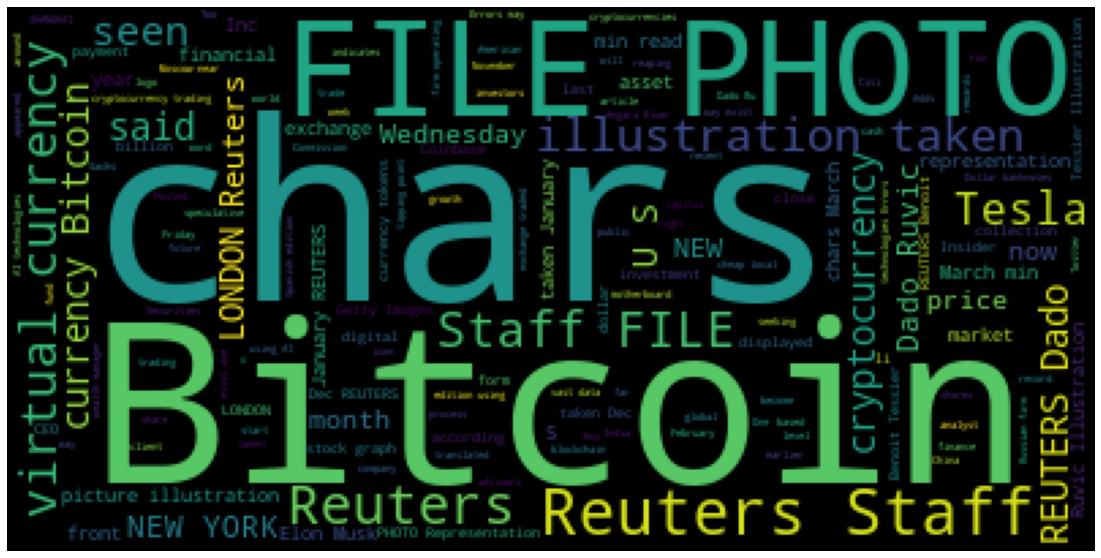

In [86]:
# Generate the Bitcoin word cloud
btc = WordCloud(background_color='black').generate(btc_df.text.str.cat())
btc
plt.axis("off")
plt.imshow(btc)

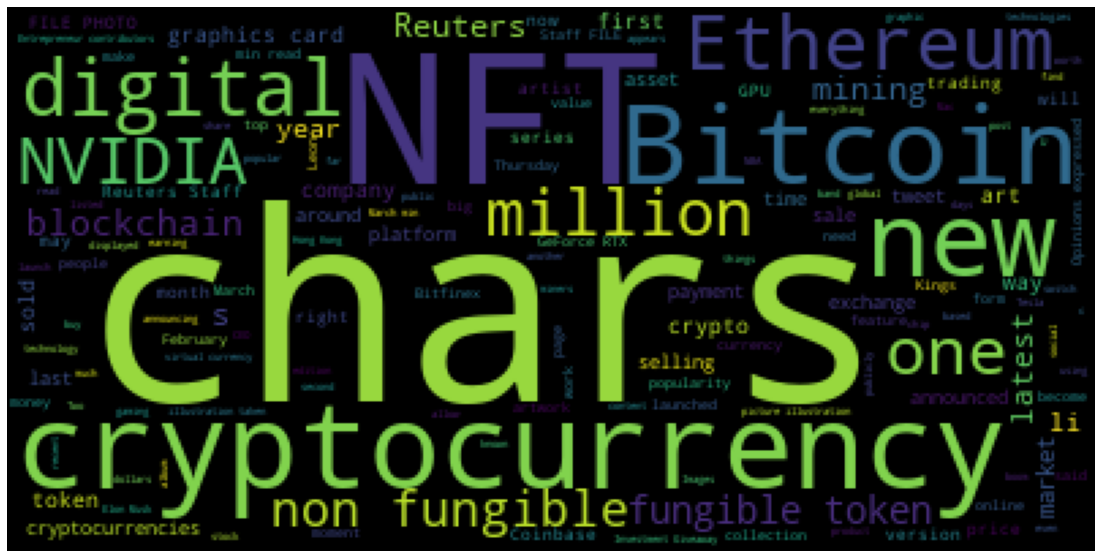

In [87]:
# Generate the Ethereum word cloud
eth = WordCloud(background_color='black').generate(eth_df.text.str.cat())
eth
plt.axis("off")
plt.imshow(eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [88]:
import spacy
from spacy import displacy

In [89]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [90]:
# Concatenate all of the Bitcoin text together
btc_concat = btc_df.text.str.cat()
btc_concat

[+2552 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, according to a new report from Reuters citing a senior government official. It… [+1725 chars]This morning Coinbase, an American cryptocurrency exchange, released an S-1 filing ahead of its direct listing. The company’s public debut has been hotly anticipated thanks to recent activity amongst… [+2409 chars]By Reuters Staff\r\nFILE PHOTO: A collection of bitcoin (virtual currency) tokens are displayed in this picture illustration

In [91]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)
btc_doc
# Add a title to the document
btc_doc.user_data["Title"] = "Bitcoin NER"

In [92]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [93]:
# List all Entities
for i in btc_doc.ents:
    print(i.text, i.label_)

earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the U

---

### Ethereum NER

In [94]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.text.str.cat()
eth_concat

ping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startups have be… [+2529 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars]NFTs (non-fungible tokens) — or scarce digital content represented

In [95]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)
eth_doc

# Add a title to the document
eth_doc.user_data["Title"] = "Ethereum NER"

In [97]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [96]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Ethereum ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
chars]MetaMask ORG
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
India GPE
Reuters ORG
Kings ORG
Leon PRODUCT
more than $2 million MONEY
Getty Images PERSON
Two CARDINAL
Ethereum PERSON
Grayscale Investments ORG
Wednesday DATE
five CARDINAL
13 CARDINAL
The Blockchain Certification Advanced Training Bundle ORG
20.60 MONEY
as of Feb. 25 DATE
96% PERCENT
Reuters ORG
Bitcoin PERSON
April 24, 2020 DATE
Reute

---